## 1. Install and import Required Libraries




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.2 MB/s 
     |████████████████████████████████| 3.4 MB 35.9 MB/s 
     |████████████████████████████████| 1.1 MB 70.1 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models (RF, NB, SVM, AdaBoost, MLP, LR)
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

98304/89078 [=================================] - 0s 0us/step


## 2. Load Dataset
Dataset is available in 2 different csv files named as train and test:


In [ ]:
!pip install xlrd==1.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:

#filename = "/content/drive/My Drive/Thesis1/reviews.xls"

#all_dfs = pd.read_excel(filename, sheet_name=None)
#df = pd.concat(all_dfs, ignore_index=True)


df1 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/1fold_aug.xlsx")
df2 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/2fold_aug.xlsx")
df3 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/3fold_aug.xlsx")
df4 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/4fold_aug.xlsx")
df5 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/5fold_aug.xlsx")
df6 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/6fold_aug.xlsx")
df7 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/7fold_aug.xlsx")
df8 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/8fold_aug.xlsx")
df9 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/9fold_aug.xlsx")
df10 = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/10fold_aug.xlsx")



In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]) 
print(df.shape)


(20095, 4)


## 3. Data Preprocessing

### 3.1 Apply  preprocessing


In [ ]:
df[['Text']].head(10)

,Text
0,ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی عاشقی ٹو...
1,حضور ٹاک شوز پر بڈی ڈال کر مھمانو ں کو کتوں کی...
2,پھر تو ایسے برے لوگ بہت بڑی تعداد میں ہیں یہاں
3,عذاب
4,جنات پر شک کرو تو اسلام کی بجلی اتنی زور سے کڑ...
5,جو کڑی شڑی پاکستان اور پاکستانی معاشرے کی رج ک...
6,مگر میں تو بتا چکی پہلے سے کہ مجھے اردو انڈین ...
7,حقیقت میں شاید میں ہی محفل پر مغرب کے سب سے زی...
8,یخخ گندے
9,اب پتا چلا کہ پاکستانی مرد بیویوں کے نیچے ایسے...


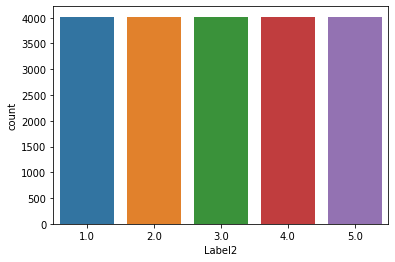

In [ ]:
sns.countplot( x = 'Label2', data = df );

In [ ]:
# create dataset
df['Label2'] = df['Label2'].fillna(' ')

In [ ]:
#dfc.loc[(dfc['Annotator 3'] == "pos") or (dfc['Annotator 3'] == "neg")]
def func(df_):
    count_val = 559
    return df_.iloc[0:count_val]
#dfc = df[(df['Label2'] == "CN") | (df['Label2'] == "FN")  | (df['Label2'] == "NEU")  | (df['Label2'] == "CP") | (df['Label2'] == "FP") ]
dfc = df[['Text', 'Label','Label2']] [(df['Label'] == "pos") | (df['Label'] == "neg")| (df['Label'] == "neu")]

#dfc = dfc.groupby('Label2', group_keys=False).apply(func)
dfc['Label2'] = dfc['Label2'].apply(np.int64)

dfc.shape

(9983, 3)

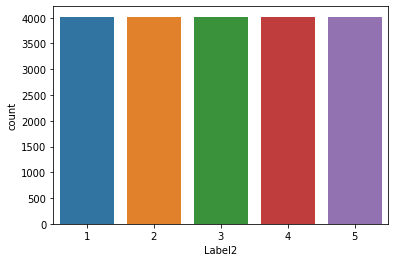

In [ ]:
df['Label2'] = df['Label2'].apply(np.int64)

sns.countplot( x = 'Label2', data = df );

In [ ]:
dfc.head()

,Text,Label,Label2
0,ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی عاشقی ٹو...,neu,1
1,حضور ٹاک شوز پر بڈی ڈال کر مھمانو ں کو کتوں کی...,neu,1
2,پھر تو ایسے برے لوگ بہت بڑی تعداد میں ہیں یہاں,neg,1
3,عذاب,neg,1
4,جنات پر شک کرو تو اسلام کی بجلی اتنی زور سے کڑ...,neg,1


In [ ]:
# Encode labels in column 'species'.
#cust_label = {'CN' : 1, 'FN' : 2, 'NEU' : 3, 'FP': 4, 'CP' : 5 }

#dfc['Labelf'] = dfc['Label2'].map(cust_label)
#dfc['Label2']= LabelEncoder().fit_transform(dfc['Label2'])
dfc['Labelf'] = dfc['Label2'].copy()
dfc['Labelf'].unique()


array([1, 5, 2, 4, 3])

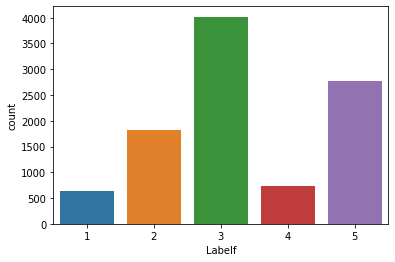

In [ ]:
sns.countplot( x = 'Labelf', data = dfc );

In [ ]:
#dfc['Labelf'].value_counts()
dfc['Label2'].value_counts()

3    4019
5    2775
2    1821
4     728
1     640
Name: Label2, dtype: int64

In [ ]:
dfc['Text2'] = str(dfc['Text'])
dfc = dfc.astype({"Text": str}, errors='raise') 



In [ ]:
dfc['Text'] = dfc['Text'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
dfc['Text'] = dfc['Text'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
dfc['Text'] = dfc['Text'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
dfc['Text'] = dfc['Text'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
dfc['Text'] = dfc['Text'].apply(replace_emails) # Replace all emails in text str with replace_with str.
dfc['Text'] = dfc['Text'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
dfc['Text'] = dfc['Text'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
dfc['Text'] = dfc['Text'].apply(remove_english_alphabets) # Removes English words and digits from a text
dfc['Text'] = dfc['Text'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [ ]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [ ]:
#dfc['Tweets'] =  dfc['Tweets'].apply(remove_stopwords)

In [ ]:
dfc['lemmatized_text'] = dfc['Text'].apply(lemitizeStr)

In [ ]:
dfc.head(10)

,Text,Label,Label2,Labelf,Text2,lemmatized_text
0,ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی عاشقی ٹو...,neu,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی عاشقی ٹو...
1,حضور ٹاک شوز پر بڈی ڈال کر مھمانو ں کو کتوں کی...,neu,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,حضور ٹاک شوز پر بڈی ڈال کر مھمانو ں کو کتوں کی...
2,پھر تو ایسے برے لوگ بہت بڑی تعداد میں ہیں یہاں,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,پھر تو ایسے برے لوگ بہت بڑی تعداد میں ہیں یہاں
3,عذاب,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,عذاب
4,جنات پر شک کرو تو اسلام کی بجلی اتنی زور سے کڑ...,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,جنات پر شک کرو تو اسلام کی بجلی اتنی زور سے کڑ...
5,جو کڑی شڑی پاکستان اور پاکستانی معاشرے کی رج ک...,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,جو کڑی شڑی پاکستان اور پاکستانی معاشرے کی رج ک...
6,مگر میں تو بتا چکی پہلے سے کہ مجھے اردو انڈین ...,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,مگر میں تو بتا چکی پہلے سے کہ مجھے اردو انڈین ...
7,حقیقت میں شاید میں ہی محفل پر مغرب کے سب سے زی...,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,حقیقت میں شاید میں ہی محفل پر مغرب کے سب سے زی...
8,یخخ گندے,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,یخخ گندے
9,اب پتا چلا کہ پاکستانی مرد بیویوں کے نیچے ایسے...,neg,1,1,0 ہا ہا ہا ہا لیکن ایک تھی ڈائن پھر بھی ...,اب پتا چلا کہ پاکستانی مرد بیویوں کے نیچے ایسے...



Data is prepared for the Modeling.

### 3.2 Train Test Split

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(dfc['lemmatized_text'], dfc['Labelf'], test_size = 0.20,stratify=dfc['Labelf'], random_state = 3, shuffle = True)

df  =  pd.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10]) 
train = df[['Text', 'Label','Label2']] #[(df['Label'] == "pos") | (df['Label'] == "neg")| (df['Label'] == "neu")]
test = df1[['Text', 'Label','Label2']] #[(df10['Label'] == "pos") | (df10['Label'] == "neg")| (df10['Label'] == "neu")]
X_train = train['Text']
X_test = test['Text']
Y_train = train['Label2']
Y_test =  test['Label2']

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (18085,)
Shape of X_test (2010,)
Shape of Y_train (18085,)
Shape of Y_test (2010,)


### 3.3 TF - IDF Vectorization

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [ ]:
#max_feature_num = 9601
vectorizer = TfidfVectorizer( )
train_vecs = vectorizer.fit_transform(X_train.values.astype('U'))
test_vecs = TfidfVectorizer(vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
# check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((18085, 13595), (2010, 13595))

## 4. Applying Machine Learning Modeling Algorithms using TF-IDF

We will apply multiple machine learning models and compare the accuracies.

### 4.1 Support Vector Machine Classifier

In [ ]:
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC()
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    resultingsvm = pd.read_excel("/content/drive/My Drive/Thesis_Final/kfold/1fold_aug.xlsx")
    #resultingsvm['X_test'] = X_test
    #resultingsvm['Y_test'] = Y_test
    resultingsvm['predictions_WA'] = test_predictionSVM
    #resultingsvm.to_excel(r'/content/drive/My Drive/Thesis_Final/kfold/1fold_aug.xlsx', index = False)
    #import seaborn as sns
    #sns.heatmap(confusion_matrix(test_predictionSVM, Y_test),  fmt='g', annot = True)
    return classification_report(test_predictionSVM, Y_test, digits=4), confusion_matrix(test_predictionSVM, Y_test)
    #return classification_report(test_predictionSVM, Y_test, digits=4), confusion_matrix(test_predictionSVM, Y_test), test_predictionSVM, Y_test

### 4.2 Logistic Regression Classifier

In [ ]:
def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)

    results = pd.DataFrame()# you create new dataframe
    results['X_test'] = X_test
    results['Y_test'] = Y_test
    results['predictions_LR'] = test_predictionLR
    #results.to_excel(r'/content/drive/My Drive/Thesis_Final/presults_LR_dataset.xlsx', index = False)

    return classification_report(test_predictionLR, Y_test, digits=4) , confusion_matrix(test_predictionLR, Y_test)

### 4.3 MLP Classifier

In [ ]:
def MLP_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    MLP =  MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=8)
    MLP.fit(train_vecs, Y_train)

    # Testing
    test_predictionMLP = MLP.predict(test_vecs)

 
  
    return classification_report(test_predictionMLP, Y_test, digits=4), confusion_matrix(test_predictionMLP, Y_test) 

### 4.4 Adaboost Classifier

In [ ]:
def ADB_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    ADB = AdaBoostClassifier(n_estimators=100, random_state=0)
    ADB.fit(train_vecs, Y_train)

    # Testing
    test_predictionADB = ADB.predict(test_vecs)
    return classification_report(test_predictionADB, Y_test, digits=4), confusion_matrix(test_predictionADB, Y_test)  


### 4.5 Random Forest Classifier

In [ ]:
def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(max_depth=200, n_estimators =400, random_state=0) 
    
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    results = pd.DataFrame()# you create new dataframe
    results['X_test'] = X_test
    results['Y_test'] = Y_test
    results['predictions_RF'] = test_predictionRF
    results.to_excel(r'/content/drive/My Drive/Thesis1/results_RF_dataset2.xlsx', index = False)

    return classification_report(test_predictionRF, Y_test, digits=4), confusion_matrix(test_predictionRF, Y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

def NB_classifier(train_vecs, y_train, test_vecs, y_test):
    # Training
    GB = MultinomialNB()
    GB.fit(train_vecs, y_train)

    # testing
    test_predictionGB = GB.predict(test_vecs)
    results = pd.DataFrame()# you create new dataframe
    results['X_test'] = X_test
    results['Y_test'] = Y_test
    results['predictions_NB'] = test_predictionGB
    results.to_excel(r'/content/drive/My Drive/Thesis1/results_NB_dataset2.xlsx', index = False)

    
    return classification_report(test_predictionGB, y_test, digits=4) , confusion_matrix(test_predictionGB, y_test)

## 5. Results of ML Algorithms


In [ ]:
class_report , conf_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of SVM CLASSIFIER on TF-IDF Vectorizer \n')
print(class_report)
print(conf_matrix)


Results of SVM CLASSIFIER on TF-IDF Vectorizer 

              precision    recall  f1-score   support

         1.0     0.9726    0.9654    0.9690       405
         2.0     0.8333    0.7957    0.8141       421
         3.0     0.6567    0.6633    0.6600       398
         4.0     0.9055    0.9146    0.9100       398
         5.0     0.7960    0.8247    0.8101       388

    accuracy                         0.8328      2010
   macro avg     0.8328    0.8328    0.8326      2010
weighted avg     0.8335    0.8328    0.8330      2010

[[391   3   8   0   3]
 [  5 335  65   5  11]
 [  6  53 264  17  58]
 [  0   4  20 364  10]
 [  0   7  45  16 320]]


In [ ]:
class_report , conf_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Logistic Regression Classifier TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier TF-IDF Vectorizer

              precision    recall  f1-score   support

         1.0     0.9204    0.9661    0.9427       383
         2.0     0.7612    0.8117    0.7856       377
         3.0     0.7239    0.5879    0.6488       495
         4.0     0.8408    0.8918    0.8656       379
         5.0     0.7662    0.8191    0.7918       376

    accuracy                         0.8025      2010
   macro avg     0.8025    0.8153    0.8069      2010
weighted avg     0.7983    0.8025    0.7981      2010

[[370   4   8   0   1]
 [ 10 306  47   9   5]
 [ 19  78 291  32  75]
 [  1   6  21 338  13]
 [  2   8  35  23 308]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
class_report , conf_matrix = MLP_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of MLP Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of MLP Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

         1.0     0.9478    0.9896    0.9682       385
         2.0     0.8085    0.8045    0.8065       404
         3.0     0.7015    0.6558    0.6779       430
         4.0     0.8856    0.9082    0.8967       392
         5.0     0.8035    0.8095    0.8065       399

    accuracy                         0.8294      2010
   macro avg     0.8294    0.8335    0.8312      2010
weighted avg     0.8263    0.8294    0.8275      2010

[[381   1   2   0   1]
 [  9 325  54   5  11]
 [  9  61 282  24  54]
 [  1   6  16 356  13]
 [  2   9  48  17 323]]


In [ ]:
class_report , conf_matrix = ADB_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Adaboost Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Adaboost Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

         1.0     0.8159    0.8962    0.8542       366
         2.0     0.6493    0.7016    0.6744       372
         3.0     0.7189    0.4238    0.5332       682
         4.0     0.5249    0.8023    0.6346       263
         5.0     0.5672    0.6972    0.6255       327

    accuracy                         0.6552      2010
   macro avg     0.6552    0.7042    0.6644      2010
weighted avg     0.6736    0.6552    0.6461      2010

[[328  13  13   2  10]
 [ 21 261  58  25   7]
 [ 45 103 289 107 138]
 [  3  13  17 211  19]
 [  5  12  25  57 228]]


In [ ]:
class_report , conf_matrix = RF_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Random Forest Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Random Forest Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

         1.0     0.9154    0.9735    0.9436       378
         2.0     0.7488    0.7859    0.7669       383
         3.0     0.7687    0.5598    0.6478       552
         4.0     0.8756    0.9488    0.9107       371
         5.0     0.6990    0.8620    0.7720       326

    accuracy                         0.8015      2010
   macro avg     0.8015    0.8260    0.8082      2010
weighted avg     0.8009    0.8015    0.7948      2010

[[368   3   4   0   3]
 [  6 301  57  11   8]
 [ 28  91 309  23 101]
 [  0   1   9 352   9]
 [  0   6  23  16 281]]


In [ ]:
class_report , conf_matrix = NB_classifier(train_vecs.todense(), Y_train, test_vecs.todense(), Y_test)
print('Results of Naive Bayes Classifier TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Results of Naive Bayes Classifier TF-IDF Vectorizer

              precision    recall  f1-score   support

         1.0     0.9876    0.8862    0.9341       448
         2.0     0.7935    0.7955    0.7945       401
         3.0     0.5995    0.6886    0.6410       350
         4.0     0.9303    0.8078    0.8647       463
         5.0     0.7562    0.8736    0.8107       348

    accuracy                         0.8134      2010
   macro avg     0.8134    0.8103    0.8090      2010
weighted avg     0.8280    0.8134    0.8179      2010

[[397  15  25   3   8]
 [  2 319  59   3  18]
 [  3  49 241   9  48]
 [  0  16  49 374  24]
 [  0   3  28  13 304]]


# 6. Sentiment Analysis using N-gram and ML Classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

BOW_convert = CountVectorizer( lowercase=False, ngram_range=(1,2))
X_train_BOW = BOW_convert.fit_transform(X_train.values.astype('U')) 
X_test_BOW = BOW_convert.transform(X_test)

In [ ]:
class_report , conf_matrix = SVM_classifier(X_train_BOW, Y_train, X_test_BOW, Y_test)
print('Results of SVM CLASSIFIER on N-Gram\n')
print(class_report)
print(conf_matrix)


Results of SVM CLASSIFIER on N-Gram

              precision    recall  f1-score   support

         1.0     0.9726    0.9726    0.9726       402
         2.0     0.8284    0.8284    0.8284       402
         3.0     0.6915    0.6764    0.6839       411
         4.0     0.9453    0.9429    0.9441       403
         5.0     0.8259    0.8469    0.8363       392

    accuracy                         0.8527      2010
   macro avg     0.8527    0.8535    0.8531      2010
weighted avg     0.8522    0.8527    0.8524      2010

[[391   4   6   0   1]
 [  1 333  61   1   6]
 [  7  57 278  12  57]
 [  2   3  12 380   6]
 [  1   5  45   9 332]]


In [ ]:
class_report , conf_matrix = LR_classifier(X_train_BOW, Y_train, X_test_BOW, Y_test)
print('Results of Logistic Regression Classifier on N-Gram\n')
print(class_report)
print(conf_matrix)


Results of Logistic Regression Classifier on N-Gram

              precision    recall  f1-score   support

         1.0     0.9577    0.9796    0.9686       393
         2.0     0.8060    0.8308    0.8182       390
         3.0     0.7289    0.6397    0.6814       458
         4.0     0.9080    0.9288    0.9182       393
         5.0     0.8010    0.8564    0.8278       376

    accuracy                         0.8403      2010
   macro avg     0.8403    0.8471    0.8428      2010
weighted avg     0.8371    0.8403    0.8378      2010

[[385   3   4   0   1]
 [  3 324  52   5   6]
 [ 13  70 293  17  65]
 [  1   3  16 365   8]
 [  0   2  37  15 322]]


In [ ]:
class_report , conf_matrix = MLP_classifier(X_train_BOW, Y_train, X_test_BOW, Y_test)
print('Results of MLP Classifier on N-Gram\n')
print(class_report)
print(conf_matrix)

Results of MLP Classifier on N-Gram

              precision    recall  f1-score   support

         1.0     0.9652    0.9652    0.9652       402
         2.0     0.8159    0.7828    0.7990       419
         3.0     0.6070    0.6835    0.6430       357
         4.0     0.9527    0.9033    0.9274       424
         5.0     0.8234    0.8113    0.8173       408

    accuracy                         0.8328      2010
   macro avg     0.8328    0.8292    0.8304      2010
weighted avg     0.8390    0.8328    0.8353      2010

[[388   5   9   0   0]
 [  2 328  67   3  19]
 [  7  57 244   5  44]
 [  2   3  28 383   8]
 [  3   9  54  11 331]]


In [ ]:
class_report , conf_matrix = ADB_classifier(X_train_BOW, Y_train, X_test_BOW, Y_test)
print('Results of Adaboost Classifier on N-Gram\n')
print(class_report)
print(conf_matrix)

Results of Adaboost Classifier on N-Gram

              precision    recall  f1-score   support

         1.0     0.8209    0.9091    0.8627       363
         2.0     0.6443    0.6907    0.6667       375
         3.0     0.7388    0.4286    0.5425       693
         4.0     0.5224    0.8203    0.6383       256
         5.0     0.5547    0.6904    0.6152       323

    accuracy                         0.6562      2010
   macro avg     0.6562    0.7078    0.6651      2010
weighted avg     0.6789    0.6562    0.6474      2010

[[330  14   6   4   9]
 [ 22 259  57  27  10]
 [ 37 110 297 109 140]
 [  5   5  16 210  20]
 [  8  14  26  52 223]]


In [ ]:
class_report , conf_matrix = RF_classifier(X_train_BOW, Y_train, X_test_BOW, Y_test)
print('Results of Random Forest Classifier on N-Gram\n')
print(class_report)
print(conf_matrix)

Results of Random Forest Classifier on N-Gram

              precision    recall  f1-score   support

         1.0     0.9328    0.9791    0.9554       383
         2.0     0.7587    0.8266    0.7912       369
         3.0     0.7935    0.5737    0.6660       556
         4.0     0.8831    0.9699    0.9245       366
         5.0     0.7189    0.8601    0.7832       336

    accuracy                         0.8174      2010
   macro avg     0.8174    0.8419    0.8240      2010
weighted avg     0.8175    0.8174    0.8108      2010

[[375   3   3   0   2]
 [  3 305  47   9   5]
 [ 24  88 319  23 102]
 [  0   0   7 355   4]
 [  0   6  26  15 289]]


In [ ]:
class_report , conf_matrix = NB_classifier(X_train_BOW.todense(), Y_train, X_test_BOW.todense(), Y_test)
print('Results of Naive Bayes Classifier N-gram\n')
print(class_report)
print(conf_matrix)

Results of Naive Bayes Classifier N-gram

              precision    recall  f1-score   support

         1.0     0.9925    0.9366    0.9638       426
         2.0     0.8607    0.8522    0.8564       406
         3.0     0.6965    0.7254    0.7107       386
         4.0     0.9726    0.8631    0.9146       453
         5.0     0.7562    0.8968    0.8205       339

    accuracy                         0.8557      2010
   macro avg     0.8557    0.8548    0.8532      2010
weighted avg     0.8647    0.8557    0.8582      2010

[[399   8  16   1   2]
 [  0 346  46   1  13]
 [  2  40 280   1  63]
 [  1   5  36 391  20]
 [  0   3  24   8 304]]
